<a href="https://colab.research.google.com/github/AntonioWanderer/CompPhys22/blob/main/Newton's_Interpolation_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
import matplotlib.pyplot as plt
from math import *

In [286]:
def interpolatedFunction(x):
  y = log(x)
  return y

In [287]:
def genPoints(a, b, n):
  dx = (b-a)/(n-1)
  x = [a+i*dx for i in range(n)]
  y = list(map(interpolatedFunction,x))
  return x, y

In [288]:
def divDiffs(x, y):
  vals = y.copy()
  ddifs = []
  l0 = len(vals)
  l = l0
  while l>1:
    step = l0 - l + 1
    for i in range(l-1):
      vals[i] = (vals[i+1]-vals[i])/(x[i+step]-x[i])
    ddifs.append(vals[0])
    l -= 1
  return ddifs

In [289]:
def restructPolynom(x,y):
  ddifs = divDiffs(x,y)
  #c = [0]*(len(y) + 1)
  #c[0] = ddifs[-1]
  c = [ddifs[-1]]
  for n in range(len(ddifs)-1,-1,-1):
    c1 = [0] + c
    for i in range(len(c)):
      c1[i] = c1[i] - c[i] * x[n]
    if n >0:
      c1[0] = c1[0] + ddifs[n-1]
    c = c1
    #print(c)
  c[0] = c[0] + y[0]
  #print(ddifs)
  return c

In [290]:
def polynomPoints(x,coefficients):
  y = 0
  for deg in range(len(coefficients)):
    y += coefficients[deg] * x ** deg
  return y

In [291]:
def errorGraph(start,stop,n):
  x0,y0 = genPoints(start, stop, n)
  midpoints = 10
  step = (stop-start)/((n-1)*midpoints)
  #print(step)
  coefficients = restructPolynom(x0,y0)
  print(coefficients)
  x = [start]
  yAnl = [interpolatedFunction(x[0])]
  yPol = [polynomPoints(x[0],coefficients)]
  diff = [yAnl[0]-yPol[0]]
  while x[-1] < stop:
    x.append(x[-1]+step)
    yAnl.append(interpolatedFunction(x[-1]))
    yPol.append(polynomPoints(x[-1],coefficients))
    diff.append(yAnl[-1]-yPol[-1])
  return x, diff

In [292]:
def absIntegrate(x,y):
  s = 0
  for i in range(len(x)-1):
    s = s + (y[i] + y[i+1])/2 * (x[i+1]-x[i])
  return s

[-1.487442610353928, 2.098039064806762, -0.7173208242307557, 0.10672436977792146]


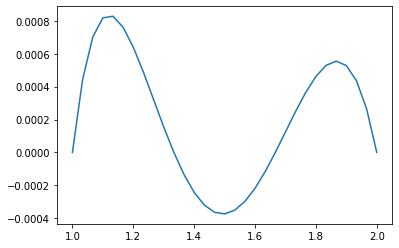

[-1.7322999741665002, 2.793741694224264, -1.4411643078631, 0.4341175508943825, -0.054394963089046414]


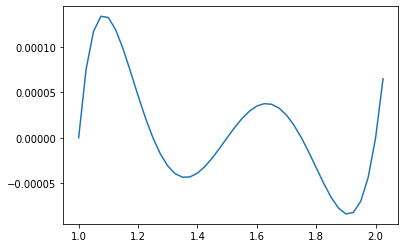

[-1.9292040965723514, 3.4884190443314904, -2.4060021815294523, 1.094028304485436, -0.27681310884922294, 0.029572038134100143]


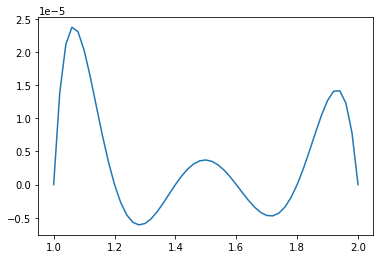

[-2.0938046354149487, 4.182581563083481, -3.61144877231467, 2.1977615191884867, -0.8390162340807088, 0.18067338873765537, -0.016746829199295498]


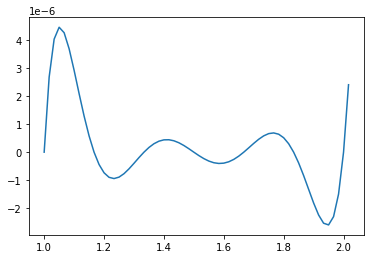

[-2.2351855722794904, 4.876450506873345, -5.057337608649309, 3.8564517430764638, -1.9706083493352011, 0.6398774896161399, -0.11940301470897546, 0.009754805407026921]


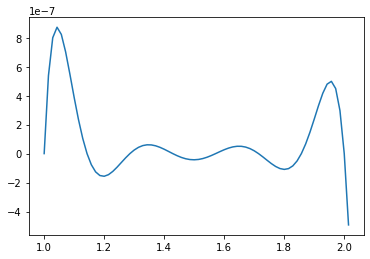

[-2.3590784647436083, 5.570136666012249, -6.743586003241543, 6.1811689011142334, -3.9589520371625353, 1.7204409779750933, -0.48383071508071795, 0.07950109883260353, -0.00580042370577488]


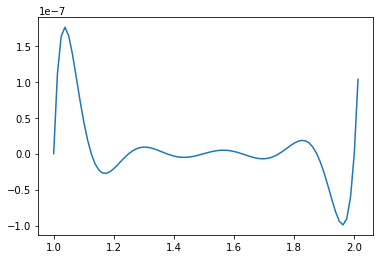

[-2.469328637684195, 6.2637014676578024, -8.67014849934222, 9.28295456916156, -7.149140001500032, 3.8943264496998635, -1.4653955210600982, 0.3627153296009023, -0.05318896587787392, 0.00350380934428968]


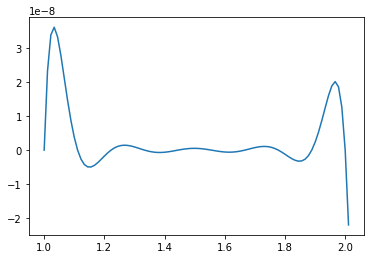

[-2.5686400346308753, 6.957181640305034, -10.836998094596545, 13.27283638423432, -11.943983838676282, 7.8242114097792115, -3.6902653338196405, 1.2219045023930302, -0.2698061921045916, 0.035702528721147236, -0.0021429716048092956]


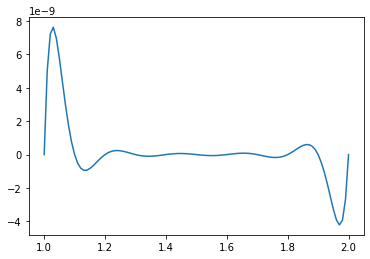

[-2.6589858517134908, 7.6506004923787305, -13.244117838040545, 18.261834681969788, -18.804009304026387, 14.39549251498877, -8.165197291432271, 3.3884175779318855, -1.000654649525028, 0.19931706732288057, -0.024021306363138907, 0.0013239065088046312]


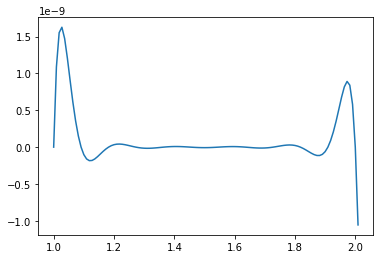

[-2.7418499138966768, 8.34397365366552, -15.891497094483906, 24.36096683888633, -28.24745580983137, 24.748289832647128, -16.405811949093504, 8.187262170461782, -3.0298804169979308, 0.8069936205390255, -0.14635627080708932, 0.01619005134121317, -0.0008247124305212927]


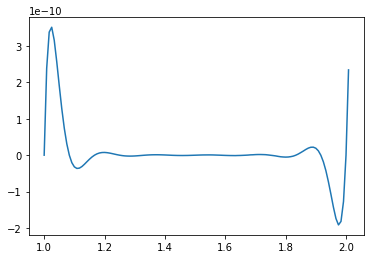

[-2.818376494601002, 9.037316163047818, -18.779146605598285, 31.681293798754552, -40.85035403561979, 40.309547472159394, -30.58344279085435, 17.837971083738765, -7.938149383744092, 2.649178361558634, -0.6423283321958573, 0.10689978090658399, -0.010926359013593378, 0.0005173414612272662]


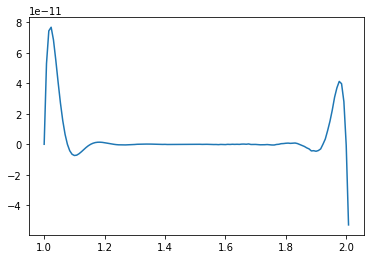

[-2.889467382204685, 9.730651727583696, -21.907138670095534, 40.33405696920686, -57.246824359142224, 62.825503677878395, -53.69092080886851, 35.84284570320868, -18.641813349464048, 7.480637887612474, -2.2723844096233394, 0.5055164229114979, -0.07771871908383216, 0.007381780128218788, -0.0003264700476602982]


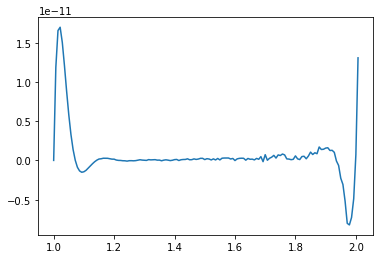

[-2.9558236969285367, 10.423779509652828, -25.274485716284183, 50.427379533671896, -78.12239342759054, 94.38382722089406, -89.71534290582353, 67.4633531752253, -40.15976212023098, 18.833488775078735, -6.878481946962696, 1.9168439393343635, -0.3938565039176728, 0.05625700812843801, -0.004989863733080902, 0.00020701948559314452]


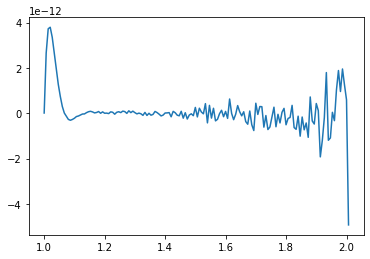

In [293]:
error = []
nums = []
for n in range(4,17):
  x, diff = errorGraph(1,2,n)
  plt.plot(x,diff)
  plt.show()
  nums.append(n)
  error.append(absIntegrate(x,diff))

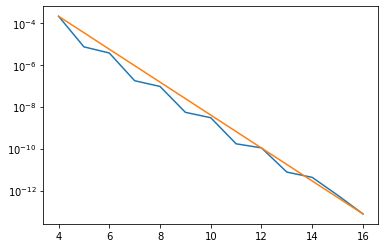

In [294]:
plt.yscale("log")
plt.plot(nums,error)
plt.plot((nums[0],nums[-1]),(error[0],error[-1]))
plt.show()